In [1]:
from pandas.io.json import json_normalize
import pandas as pd
import json
import numpy as np
import pandas.io.json as pd_json
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


In [2]:
jsonfile = pd.read_json("Resources/mergedjson.json")
jsonfile

modifiedjson = jsonfile.drop(['target_fg','target_og','contributed_by','boil_volume', 'method', 'volume','attenuation_level'], axis = 1)

In [44]:
#function to scale srm values based on scale
#https://www.twobeerdudes.com/beer/srm
def srmCat(s):
    if s['srm'] >= 1 and s['srm'] < 3:
        return 'Pale Lager, Pilsner, Witbier, Berliner Weisse'
#     elif 3 >= s['srm'] < 4:
    elif s['srm'] >=3 and s['srm'] < 4:
        return 'Straw'
#     elif 4 >= s['srm'] < 6:
    elif s['srm'] >=4 and s['srm'] < 6:
        return 'Pale Gold'
#     elif 6 >= s['srm'] < 8:
    elif s['srm'] >=6 and s['srm'] < 8:
        return 'Deep Gold'
#     elif 8 >= s['srm'] < 10:
    elif s['srm'] >=8 and s['srm'] < 10:
        return 'Pale Amber'
#     elif 10 >= s['srm'] < 13:
    elif s['srm'] >=10 and s['srm'] < 13:
        return 'Medium Amber'
#     elif 13 >= s['srm'] < 17:
    elif s['srm'] >=13 and s['srm'] < 17:
        return 'Deep Amber'
#     elif 17 >= s['srm'] < 20:
    elif s['srm'] >=17 and s['srm'] < 20:
        return 'Amber Brown'
#     elif 20 >= s['srm'] < 24:
    elif s['srm'] >=20 and s['srm'] < 24:
        return 'Brown'
#     elif 24 >= s['srm'] < 35:
    elif s['srm'] >=24 and s['srm'] < 35:
        return 'Ruby Brown'
#     elif 35 >= s['srm'] < 40:
    elif s['srm'] >=35 and s['srm'] < 40:
        return 'Deep Brown'
    elif s['srm'] >= 40:
        return 'Black'
    else:
        return 'Undefined'
    
modifiedjson['srm_category'] = modifiedjson.apply(srmCat, axis=1)

In [36]:
#function to scale ibu into 3 categories 
def ibuCat(i):
    if i['ibu'] >= 0 and i['ibu'] < 25:
        return 'Low'
#   elif 25 >= i['ibu'] < 40:
    elif i['ibu'] >= 25 and i['ibu'] < 40:
        return 'Medium'
    elif i['ibu'] >=40:
        return 'High'
    else:
        return 'Undefined'
    
modifiedjson['ibu_category'] = modifiedjson.apply(ibuCat, axis =1)

In [40]:
#function to scale abv into 3 categories 
def abvCat(a):
    if a['abv'] >= 0 and a['abv'] < 9:
        return 'Low'
#   elif 9 >= a['abv'] < 16:
    elif a['abv'] >= 9 and a['abv'] < 16:
        return 'Medium'
    elif a['abv'] >=16:
        return 'High'
    else:
        return 'Undefined'

modifiedjson['abv_category'] = modifiedjson.apply(abvCat, axis =1)    

In [45]:
beerdata = modifiedjson[['id','name','ibu','ibu_category','srm','srm_category','abv','abv_category', 'ebc','description',
                        'image_url','ingredients','ph','food_pairing', 'tagline','brewers_tips']].set_index('id')
beerdata.to_csv('beerdata.csv')
shortbeerdata = beerdata.drop(columns=['ingredients', 'food_pairing'])
shortbeerdata

,name,ibu,ibu_category,srm,srm_category,abv,abv_category,ebc,description,image_url,ph,tagline,brewers_tips
id,,,,,,,,,,,,,
1,Buzz,60.0,High,10.0,Medium Amber,4.50,Low,20.0,"A light, crisp and bitter IPA brewed with Engl...",https://images.punkapi.com/v2/keg.png,4.4,A Real Bitter Experience.,The earthy and floral aromas from the hops can...
2,Trashy Blonde,41.5,High,15.0,Deep Amber,4.10,Low,15.0,"A titillating, neurotic, peroxide punk of a Pa...",https://images.punkapi.com/v2/2.png,4.4,You Know You Shouldn't,Be careful not to collect too much wort from t...
3,Berliner Weisse With Yuzu - B-Sides,8.0,Low,4.0,Pale Gold,4.20,Low,8.0,Japanese citrus fruit intensifies the sour nat...,https://images.punkapi.com/v2/keg.png,3.2,Japanese Citrus Berliner Weisse.,Clean everything twice. All you want is the cl...
4,Pilsen Lager,55.0,High,15.0,Deep Amber,6.30,Low,30.0,Our Unleash the Yeast series was an epic exper...,https://images.punkapi.com/v2/4.png,4.4,Unleash the Yeast Series.,Play around with the fermentation temperature ...
5,Avery Brown Dredge,59.0,High,5.0,Pale Gold,7.20,Low,10.0,An Imperial Pilsner in collaboration with beer...,https://images.punkapi.com/v2/5.png,4.4,Bloggers' Imperial Pilsner.,Make sure you have a big enough yeast starter ...
6,Electric India,38.0,Medium,7.5,Deep Gold,5.20,Low,15.0,"Re-brewed as a spring seasonal, this beer â€“ ...",https://images.punkapi.com/v2/6.png,4.4,Vibrant Hoppy Saison.,Source some really good heather honey to get t...
7,AB:12,35.0,Medium,40.0,Black,11.20,Medium,80.0,An Imperial Black Belgian Ale aged in old Inve...,https://images.punkapi.com/v2/7.png,5.3,Imperial Black Belgian Ale.,Don't worry too much about controlling the tem...
8,Fake Lager,40.0,High,6.0,Deep Gold,4.70,Low,12.0,Fake is the new black. Fake is where it is at....,https://images.punkapi.com/v2/8.png,4.4,Bohemian Pilsner.,Once the primary fermentation is complete get ...
9,AB:07,30.0,Medium,42.0,Black,12.50,Medium,84.0,Whisky cask-aged imperial scotch ale. Beer per...,https://images.punkapi.com/v2/9.png,5.6,Whisky Cask-Aged Scotch Ale.,Authentic heather honey adds a beautiful flora...


In [7]:
# connection_string = "db/beerdata.sqlite"
# engine = create_engine(f'sqlite:///{connection_string}')
# beerdata.to_sql(name='shortbeerdata', con=engine, if_exists='append', index=True)

C:\Users\lonny\anacond\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


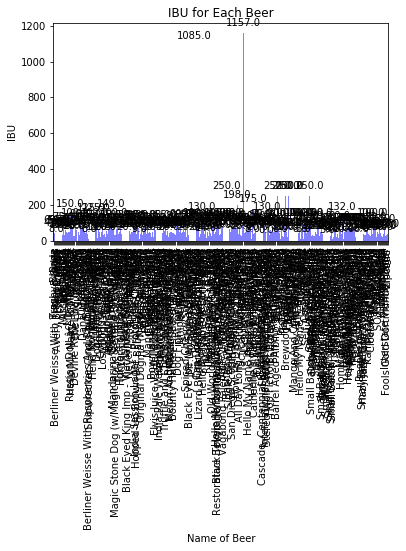

In [8]:
#shortbeerdata

# bar chart IBU for each beer
x_axis = shortbeerdata['name']
y_axis = shortbeerdata['ibu']


plt.title("IBU for Each Beer")
x_label = "Name of Beer"
y_label = "IBU"
plt.xlabel(x_label)
plt.ylabel(y_label)

#plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x', tight=True)

###

#plt.text() , you need to give (x,y) location , where you want to put the numbers,
#So here index will give you x pos and data+1 will provide a little gap in y axis.
for index,data in enumerate(y_axis):
    plt.text(x=index , y =data+40 , s=f"{data}" , horizontalalignment='center', fontdict=dict(fontsize=10))

plt.tight_layout()
###

# Save Figure
plt.savefig("IBU by Beer")

# Show plot - example
plt.show()

In [9]:
# COMMENTS - needed to use jupyter/pandas to convert the csv to df to html:

# File to Load (Remember to Change These)
file_to_load = "beerdata.csv"

# Read Purchasing File and store into Pandas data frame
beerdata = pd.read_csv(file_to_load)

beerdata_df = pd.DataFrame(beerdata)

beerdata_df.to_html("beerdata_table.html")
# now move the html file to the required folder and the details and links needed with the other html files/pages

UnicodeEncodeError: 'charmap' codec can't encode character '\ufffd' in position 41676: character maps to <undefined>

In [10]:
data_table = beerdata_df.to_html(escape=False)
print(data_table)

#df.to_html(escape=False)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>id</th>
      <th>name</th>
      <th>ibu</th>
      <th>ibu_category</th>
      <th>srm</th>
      <th>srm_category</th>
      <th>abv</th>
      <th>abv_category</th>
      <th>ebc</th>
      <th>description</th>
      <th>image_url</th>
      <th>ingredients</th>
      <th>ph</th>
      <th>food_pairing</th>
      <th>tagline</th>
      <th>brewers_tips</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>Buzz</td>
      <td>60.0</td>
      <td>High</td>
      <td>10.00</td>
      <td>Medium Amber</td>
      <td>4.50</td>
      <td>Low</td>
      <td>20.0</td>
      <td>A light, crisp and bitter IPA brewed with Engl...</td>
      <td>https://images.punkapi.com/v2/keg.png</td>
      <td>{'malt': [{'name': 'Maris Otter Extra Pale', '...</td>
      <td>4.4</td>
      <td>['Spicy chicken tikka masala', 'Grilled chicke...</td>
      <td>A Real B

In [12]:
# trying to df with clickable url link built in to convert to table.  didn't work.
#df = pd.DataFrame(data)

def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

shortbeerdata2 = shortbeerdata.style.format({'url': make_clickable})

In [13]:
shortbeerdata2

,name,ibu,ibu_category,srm,srm_category,abv,abv_category,ebc,description,image_url,ph,tagline,brewers_tips
id,,,,,,,,,,,,,
1,Buzz,60,High,10,Medium Amber,4.5,Low,20,"A light, crisp and bitter IPA brewed with English and American hops. A small batch brewed only once.",https://images.punkapi.com/v2/keg.png,4.4,A Real Bitter Experience.,The earthy and floral aromas from the hops can be overpowering. Drop a little Cascade in at the end of the boil to lift the profile with a bit of citrus.
2,Trashy Blonde,41.5,High,15,Amber Brown,4.1,Low,15,"A titillating, neurotic, peroxide punk of a Pale Ale. Combining attitude, style, substance, and a little bit of low self esteem for good measure; what would your mother say? The seductive lure of the sassy passion fruit hop proves too much to resist. All that is even before we get onto the fact that there are no additives, preservatives, pasteurization or strings attached. All wrapped up with the customary BrewDog bite and imaginative twist.",https://images.punkapi.com/v2/2.png,4.4,You Know You Shouldn't,Be careful not to collect too much wort from the mash. Once the sugars are all washed out there are some very unpleasant grainy tasting compounds that can be extracted into the wort.
3,Berliner Weisse With Yuzu - B-Sides,8,Low,4,Pale Gold,4.2,Low,8,Japanese citrus fruit intensifies the sour nature of this German classic.,https://images.punkapi.com/v2/keg.png,3.2,Japanese Citrus Berliner Weisse.,Clean everything twice. All you want is the clean sourness of lactobacillus.
4,Pilsen Lager,55,High,15,Amber Brown,6.3,Low,30,"Our Unleash the Yeast series was an epic experiment into the differences in aroma and flavour provided by switching up your yeast. We brewed up a wort with a light caramel note and some toasty biscuit flavour, and hopped it with Amarillo and Centennial for a citrusy bitterness. Everything else is down to the yeast. Pilsner yeast ferments with no fruity esters or spicy phenols, although it can add a hint of butterscotch.",https://images.punkapi.com/v2/4.png,4.4,Unleash the Yeast Series.,Play around with the fermentation temperature to get the best flavour profile from the individual yeasts.
5,Avery Brown Dredge,59,High,5,Deep Gold,7.2,Low,10,"An Imperial Pilsner in collaboration with beer writers. Tradition. Homage. Revolution. We wanted to showcase the awesome backbone of the Czech brewing tradition, the noble Saaz hop, and also tip our hats to the modern beers that rock our world, and the people who make them.",https://images.punkapi.com/v2/5.png,4.4,Bloggers' Imperial Pilsner.,Make sure you have a big enough yeast starter to ferment through the OG and lager successfully.
6,Electric India,38,Undefined,7.5,Pale Amber,5.2,Low,15,"Re-brewed as a spring seasonal, this beer â€“ which appeared originally as an Equity Punk shareholder creation â€“ retains its trademark spicy, fruity edge. A perfect blend of Belgian Saison and US IPA, crushed peppercorns and heather honey are also added to produce a genuinely unique beer.",https://images.punkapi.com/v2/6.png,4.4,Vibrant Hoppy Saison.,Source some really good heather honey to get the right spicy esters in the beer.
7,AB:12,35,Undefined,40,Black,11.2,Undefined,80,"An Imperial Black Belgian Ale aged in old Invergordon Scotch whisky barrels with mountains of raspberries, tayberries and blackberries in each cask. Decadent but light and dry, this beer would make a fantastic base for ageing on pretty much any dark fruit - we used raspberries, tayberries and blackberries beause they were local.",https://images.punkapi.com/v2/7.png,5.3,Imperial Black Belgian Ale.,Don't worry too much about controlling the temperature with the Belgian yeast strain - just make sure it doesn't rise above 30Â°C!
8,Fake Lager,40,High,6,Deep Gold,4.7,Low,12,"Fake is the new black. Fake is where it is at. Fake Art, fake brands, fake breasts, and fake lager. We want to play our part in the ugly fallout from the Lager Dream. Say hello to Fake Lager â€“ a zesty, floral 21s

In [26]:
# binary coding test: build test df
test_df = pd.DataFrame(columns=["A", "B", "C"], data=[["chocolate", "vanilla", "strawberry"], ["cup", "vanilla", "cone"], ["chocolate", "strawberry", "vanilla"]])
test_df

,A,B,C
0,chocolate,vanilla,strawberry
1,cup,vanilla,cone
2,chocolate,strawberry,vanilla


In [27]:
# binary coding test: convert to binary
binary_test = pd.get_dummies(test_df, columns=["A", "B"])
binary_test

,C,A_chocolate,A_cup,B_strawberry,B_vanilla
0,strawberry,1,0,0,1
1,cone,0,1,0,1
2,vanilla,1,0,1,0


In [46]:
data = shortbeerdata
binary_beer = pd.get_dummies(data, columns=['ibu_category', 'abv_category', 'srm_category'])
binary_beer.head()


,name,ibu,srm,abv,ebc,description,image_url,ph,tagline,brewers_tips,...,srm_category_Deep Amber,srm_category_Deep Brown,srm_category_Deep Gold,srm_category_Medium Amber,srm_category_Pale Amber,srm_category_Pale Gold,"srm_category_Pale Lager, Pilsner, Witbier, Berliner Weisse",srm_category_Ruby Brown,srm_category_Straw,srm_category_Undefined
id,,,,,,,,,,,,,,,,,,,,,
1,Buzz,60.0,10.0,4.5,20.0,"A light, crisp and bitter IPA brewed with Engl...",https://images.punkapi.com/v2/keg.png,4.4,A Real Bitter Experience.,The earthy and floral aromas from the hops can...,...,0,0,0,1,0,0,0,0,0,0
2,Trashy Blonde,41.5,15.0,4.1,15.0,"A titillating, neurotic, peroxide punk of a Pa...",https://images.punkapi.com/v2/2.png,4.4,You Know You Shouldn't,Be careful not to collect too much wort from t...,...,1,0,0,0,0,0,0,0,0,0
3,Berliner Weisse With Yuzu - B-Sides,8.0,4.0,4.2,8.0,Japanese citrus fruit intensifies the sour nat...,https://images.punkapi.com/v2/keg.png,3.2,Japanese Citrus Berliner Weisse.,Clean everything twice. All you want is the cl...,...,0,0,0,0,0,1,0,0,0,0
4,Pilsen Lager,55.0,15.0,6.3,30.0,Our Unleash the Yeast series was an epic exper...,https://images.punkapi.com/v2/4.png,4.4,Unleash the Yeast Series.,Play around with the fermentation temperature ...,...,1,0,0,0,0,0,0,0,0,0
5,Avery Brown Dredge,59.0,5.0,7.2,10.0,An Imperial Pilsner in collaboration with beer...,https://images.punkapi.com/v2/5.png,4.4,Bloggers' Imperial Pilsner.,Make sure you have a big enough yeast starter ...,...,0,0,0,0,0,1,0,0,0,0


In [47]:
binary_beer.to_csv('binary_beer.csv')